In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from drawarrow import ax_arrow , fig_arrow


import warnings
warnings.filterwarnings('ignore')


In [2]:
url="https://raw.githubusercontent.com/domthem/Meteo-France-temperatures-maximales-1996-2022/refs/heads/main/meteo_synop_omm_annuel.csv"
df=pd.read_csv(url)

In [3]:
df

,Année,ID_station,Jours>30°C,Station
0,1996,7005,1,ABBEVILLE
1,1996,7015,1,LILLE-LESQUIN
2,1996,7020,0,PTE DE LA HAGUE
3,1996,7027,2,CAEN-CARPIQUET
4,1996,7037,0,ROUEN-BOOS
...,...,...,...,...
1155,2024,7650,53,MARIGNANE
1156,2024,7690,16,NICE
1157,2024,7747,39,PERPIGNAN
1158,2024,7761,44,AJACCIO


In [4]:
#Calcul de la médiane (ou essayer avec moyenne) sur toute la période
val_mediane=int(df["Jours>30°C"].median())

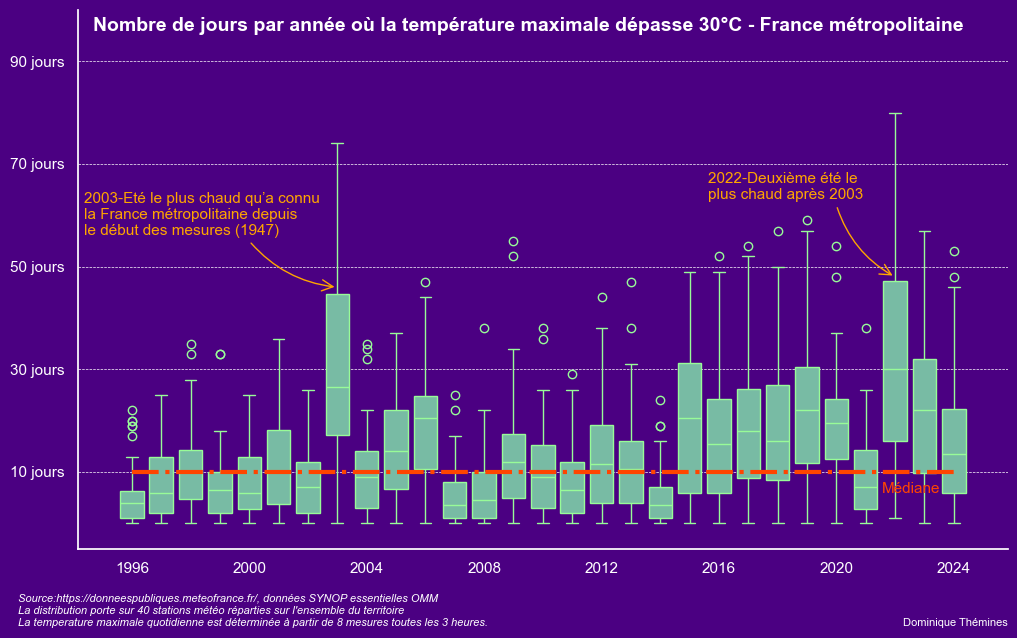

In [57]:
#Version française

fig,ax=plt.subplots(figsize=(12,7))
x=df["Année"]
y=df["Jours>30°C"]

#boxplot 
sns.boxplot(df,x=x,y=y,
            color="#66cdaa",
            saturation=0.65,
            linecolor="#98fb98",
            ax=ax)

#courbe médiane
couleur_médiane="orangered"
prop_ligne={"linestyles":"dashdot","linewidth":3,"zorder":5,"color" :couleur_médiane}
ax.hlines(y=val_mediane,xmin="1996",xmax="2024",
          **prop_ligne,
          label="Médiane toutes années et stations")

#Couleurs de fond
#couleur_fond="#663399","#008b8b","#6a5acd"
couleur_fond="#4b0082"
ax.set_facecolor(couleur_fond)
fig.set_facecolor(couleur_fond)

#Cadre et axes
ax.spines[["top","right"]].set_visible(False)
ax.spines[["top", "right", "left", "bottom"]].set_color("white")
ax.set_xlabel("")
ax.set_ylabel("")

posx=["1996","2000","2004","2008","2012","2016","2020","2024"]
labx=["1996","2000","2004","2008","2012","2016","2020","2024"]
ax.set_xticks(posx,labels=labx,color="white")

posy=[10,30,50,70,90]
laby=["10 jours","30 jours","50 jours","70 jours","90 jours"]
ax.set_yticks(posy,labels=laby,color="white")
ax.set_ylim(-5,100)
ax.grid(axis="y", 
  color="white",
  linewidth=0.5,
  linestyle="--",)


#Textes
##Titre
titre="Nombre de jours par année où la température maximale dépasse 30°C - France métropolitaine"
fig.text(0.5,0.85,s=titre,ha="center",color="white",size=14,fontweight="bold")

##Description des données
texte1="Source:https://donneespubliques.meteofrance.fr/, données SYNOP essentielles OMM"
texte2="\nLa distribution porte sur 40 stations météo réparties sur l'ensemble du territoire"
texte3="\nLa temperature maximale quotidienne est déterminée à partir de 8 mesures toutes les 3 heures."  
      
fig.text(0.075,0,s=texte1+texte2+texte3,size=8,color="white",ha="left",style="italic")

##Texte médiane
texte4="Médiane"     
fig.text(0.795,0.19,texte4,size=11,color=couleur_médiane)

##Texte auteur
texte4="Dominique Thémines"     
fig.text(0.90,0,texte4,size=8,color="white",ha="right")


#Ajout de flèche années 2003 et 2022
couleur_flèche="orange"

#1ère flèche
ax_arrow(
  ["2000", 55], ["2003", 46],
  color=couleur_flèche,
  radius=0.2,
  fill_head=False
)

##Texte flèche
texte5="2003-Eté le plus chaud qu’a connu \nla France métropolitaine depuis \nle début des mesures (1947)"
fig.text(x=0.13, y=0.62, s=texte5,size=11, ha="left",va="top",color=couleur_flèche)

#2ième flèche
ax_arrow(
  ["2020", 62], ["2022", 48],
  color=couleur_flèche,
  radius=0.2,
  fill_head=False
)

##Texte flèche
texte6="2022-Deuxième été le \nplus chaud après 2003"
fig.text(x=0.65, y=0.61, s=texte6,size=11, ha="left",color=couleur_flèche)

plt.show()
    

In [61]:
fig.savefig("nouvelle_version.png", dpi=300, bbox_inches='tight')